# Problem Statement
- C) Construct a multiple regression model by selecting appropriate
  features. The models may be designed based on selection of different feature combinations. Compare the results of such models   and give interpretation of better model based on evaluation metrics.

  1) Refer the USA house pricing dataset.

  2) Refer 50 Startups Dataset

# Data Preprocessing

In [35]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
data=pd.read_csv("C:/M.sc Data Science clg/DS SEM 2/ML Assignments/Assignment no 2/50_Startups.csv")

In [37]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
# missing values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [39]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [40]:
# Check relationship between Dependent and independant variable

In [41]:
x1=data.iloc[:,0]
y1=data.iloc[:,-1]

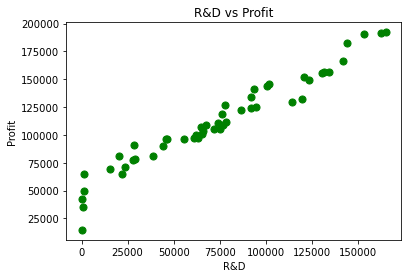

In [42]:
plt.scatter(x1,y1,color="Green",s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()

In [43]:
# Separating dependent and indeoendant variables

In [57]:
X=data.iloc[:, :-1].values# indedependant varibles

In [59]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [62]:
y=data.iloc[:, 4].values # depedenant variables

In [64]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [54]:
# now encode state column in numeric

In [68]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])


In [70]:
X=X[:, 1:]

In [73]:
print(X)

[[136897.8 471784.1 2]
 [151377.59 443898.53 0]
 [101145.55 407934.54 1]
 [118671.85 383199.62 2]
 [91391.77 366168.42 1]
 [99814.71 362861.36 2]
 [147198.87 127716.82 0]
 [145530.06 323876.68 1]
 [148718.95 311613.29 2]
 [108679.17 304981.62 0]
 [110594.11 229160.95 1]
 [91790.61 249744.55 0]
 [127320.38 249839.44 1]
 [135495.07 252664.93 0]
 [156547.42 256512.92 1]
 [122616.84 261776.23 2]
 [121597.55 264346.06 0]
 [145077.58 282574.31 2]
 [114175.79 294919.57 1]
 [153514.11 0.0 2]
 [113867.3 298664.47 0]
 [153773.43 299737.29 2]
 [122782.75 303319.26 1]
 [105751.03 304768.73 1]
 [99281.34 140574.81 2]
 [139553.16 137962.62 0]
 [144135.98 134050.07 1]
 [127864.55 353183.81 2]
 [182645.56 118148.2 1]
 [153032.06 107138.38 2]
 [115641.28 91131.24 1]
 [152701.92 88218.23 2]
 [129219.61 46085.25 0]
 [103057.49 214634.81 1]
 [157693.92 210797.67 0]
 [85047.44 205517.64 2]
 [127056.21 201126.82 1]
 [51283.14 197029.42 0]
 [65947.93 185265.1 2]
 [82982.09 174999.3 0]
 [118546.05 172795.67 0

In [72]:
#data.replace({'State':{'New York':0,'California':1,'Florida':2}},inplace=True)

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.25,random_state=0)

# Building a model

In [75]:
# fitting multiple Linear Regression
from sklearn.linear_model import LinearRegression

In [76]:
lm=LinearRegression()

In [77]:
lm.fit(X_train,y_train)

LinearRegression()

In [78]:
# predicting the Test set
y_pred=lm.predict(X_test)

In [79]:
y_pred

array([114465.653533  , 103083.59556602, 111000.48069287,  85077.03413176,
       149301.25363535, 152413.53901259,  87292.72417869, 100107.06002675,
       133520.15159655, 135428.64816515, 104469.38162149,  99935.82850612,
       102363.71230582])

In [82]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 20080.314018595338
MSE: 669710001.1378558
RMSE: 25878.755788056267


# R2 SCORE FUNCTION
- Now we will use the R2 Score function to compare our models accuracy.

In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [84]:
score

0.37920380794623054

# House Price Prediction Multiple Linear Regression


In [94]:
# Import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [85]:
# Import datasets

In [87]:
df=pd.read_csv("C:/M.sc Data Science clg/DS SEM 2/ML Assignments/Assignment no 2/USA_Housing.csv")

In [88]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [90]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [111]:
# droppping unnessary columns like address
df.drop(['Address'],axis=1,inplace=True)

In [112]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545,5,7,4,23086,1059033
1,79248,6,6,3,40173,1505890
2,61287,5,8,5,36882,1058987
3,63345,7,5,3,34310,1260616
4,59982,5,7,4,26354,630943


# Data Visualization

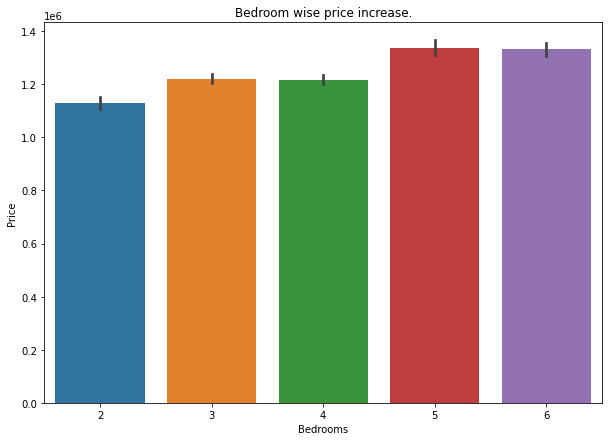

In [113]:
# barploat show

plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot('Avg. Area Number of Bedrooms', 'Price', data=df)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

<Figure size 720x504 with 0 Axes>

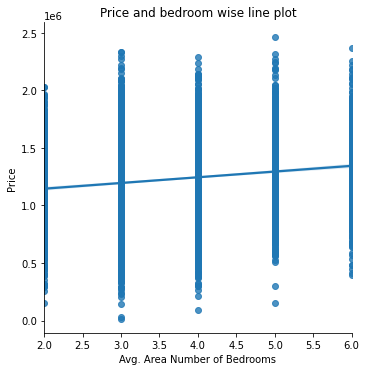

In [114]:
plt.figure(figsize=(10, 7))

sns.lmplot(x='Avg. Area Number of Bedrooms', y="Price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()

In [98]:
# Model Implementing

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lm=LinearRegression()

In [117]:
# Dependant and Indpendent values
X=df.drop(['Price'],axis=1)
y=df['Price']

In [118]:
# Change  data type float to int
df['Avg. Area Income'] = df['Avg. Area Income'].astype('int64')
df['Avg. Area House Age'] = df['Avg. Area House Age'].astype('int64')
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].astype('int64')
df['Area Population'] = df['Area Population'].astype('int64')
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype('int64')
df['Price'] = df['Price'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Avg. Area Income              5000 non-null   int64
 1   Avg. Area House Age           5000 non-null   int64
 2   Avg. Area Number of Rooms     5000 non-null   int64
 3   Avg. Area Number of Bedrooms  5000 non-null   int64
 4   Area Population               5000 non-null   int64
 5   Price                         5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [119]:
#  shows the variables
print(X)
print("-" * 25)
print(y)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                79545                    5                          7   
1                79248                    6                          6   
2                61287                    5                          8   
3                63345                    7                          5   
4                59982                    5                          7   
...                ...                  ...                        ...   
4995             60567                    7                          6   
4996             78491                    6                          6   
4997             63390                    7                          4   
4998             68001                    5                          7   
4999             65510                    5                          6   

      Avg. Area Number of Bedrooms  Area Population  
0                                4            23086  
1  

In [120]:
# fitting model
lm.fit(X,y)

LinearRegression()

In [124]:
# Prediction
lm.predict([[79545,5,7,4,23086]])

array([1253284.21235276])

In [125]:
lm.coef_

array([2.14775188e+01, 1.52032701e+05, 1.12038813e+05, 6.67206016e+02,
       1.51545984e+01])

In [127]:
lm.intercept_

-2352108.0959188193

In [128]:
score = lm.score( X, y )

print(score * 100)

89.28345126886275
